<a href="https://colab.research.google.com/github/TFrolova/DPO_2022/blob/main/Prince_frequencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# извлечем список слов из поля LEMMA и запомним его в переменную
#prince_lemmas = 
# для этого

In [ ]:
# сначала открываем файл
with open ('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt', 'r', encoding='UTF8') as f:
  p_text=f.read()
print(p_text[:20])

﻿<?xml version="1.0"


In [ ]:
# библиотека для работы с xml
import xml.etree.ElementTree as ET

In [ ]:
# прочитали и сделали дерево из большого файла (= "распарсили")
tree = ET.parse('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt')

In [ ]:
# находим главный тег и проверяем, как он называется
root = tree.getroot()
root.tag

'text'

In [ ]:
# text - это правильно
# Какие есть теги внутри главного
# можно не запускать
for child in root:
     print(child.tag)

inf
body


In [ ]:
# сохраним содержимое второго тега (body) в переменную body (по названию тега)
# нужно запустить один раз
body = root[1]

In [ ]:
# как называется первый тег внутри body
# если уже знать, можно не запускать
print(body[0].tag)

S


In [ ]:
# посмотрим на теги внутри первого S
first_sentence = body[0]
for s_child in first_sentence:
  print(s_child.tag)

W
W
W
SEM


In [ ]:
# внутри W тегов нет, есть атрибуты, они устроены как словарь
first_word = first_sentence[0]
print(first_word.attrib)
#for w_child in first_word:
#  print(w_child.attrib)

{'DOM': '_root', 'EXTRAFEAT': 'CAP ЗЕРО', 'FEAT': 'S ЕД МУЖ ИМ ОД', 'HYPOT': 'root', 'ID': '1', 'KSNAME': 'АНТУАН', 'LEMMA': 'АНТУАН'}


In [ ]:
# в атрибуте LEMMA лежит имя леммы, оно мне и нужно
# пробуем вытащить значение по ключу
first_word.attrib['LEMMA']

'АНТУАН'

In [ ]:
# заводим список, в который будем сохранять леммы
prince_lemmas = []

In [ ]:
# на случай если понадобится список всех тегов W
prince_words = []

In [ ]:
# проверяю, что так сработает цикл с i
for i in range(0, 4):
  print(first_sentence[i].tag)

W
W
W
SEM


In [ ]:
# теперь нужно сделать цикл, который извлекает все леммы из слов одного предложения
for i in range(0, 4):
  if first_sentence[i].tag == 'W':
    prince_lemmas.append(first_sentence[i].attrib['LEMMA'])

print(prince_lemmas)

['АНТУАН', 'ДЕ', 'СЕНТ-ЭКЗЮПЕРИ']


In [ ]:
# как задать range?
for i in range(len(first_sentence)):
  if first_sentence[i].tag == 'W':
    prince_lemmas.append(first_sentence[i].attrib['LEMMA'])

print(prince_lemmas)

['АНТУАН', 'ДЕ', 'СЕНТ-ЭКЗЮПЕРИ', 'АНТУАН', 'ДЕ', 'СЕНТ-ЭКЗЮПЕРИ']


In [ ]:
# новые леммы приписались к первоначальному списку, так что нужно для нового поиска новый список завести
# как задать range?
prince_lemmas = []
for i in range(len(first_sentence)):
  if first_sentence[i].tag == 'W':
    prince_lemmas.append(first_sentence[i].attrib['LEMMA'])

print(prince_lemmas)

['АНТУАН', 'ДЕ', 'СЕНТ-ЭКЗЮПЕРИ']


In [ ]:
# теперь нужно сделать цикл, который извлекает все леммы из всех слов всех предложений
# бывают ли пустые леммы? если есть, есть ли проблема записать их в список?
# попробуем  засунуть цикл из предыдущей ячейки в функцию
def find_lemmas(j):
  for i in range(len(body[j])):
    if body[j][i].tag == 'W':
      prince_lemmas.append(body[j][i].attrib['LEMMA'])

# проверим, как она работает
prince_lemmas = []
find_lemmas(2)
print(prince_lemmas)


['НОРА', 'ГАЛЬ', 'ПЕРЕВОД']


In [ ]:
# попробуем применить эту функцию ко всем предложениям текста
prince_lemmas = []
for j in range(len(body)):
   find_lemmas(j)
  
print(len(prince_lemmas))

12256


In [ ]:
# кажется, таким образом можно извлечь самые частотные слова из "Маленького принца"
from collections import Counter
Counter(prince_lemmas).most_common(50)
#print(Counter(full_text).most_common(50))

[('Я', 555),
 ('И', 456),
 ('ОН', 369),
 ('НЕ', 329),
 ('МАЛЕНЬКИЙ', 202),
 ('БЫТЬ', 201),
 ('ТЫ', 188),
 ('НА', 182),
 ('В', 181),
 ('ПРИНЦ', 180),
 ('ЧТО', 178),
 ('ЭТО', 161),
 ('СКАЗАТЬ', 135),
 ('ОНИ', 132),
 ('А', 126),
 ('НО', 116),
 ('КАК', 97),
 ('У', 96),
 ('ОНА', 93),
 ('С', 88),
 ('МОЙ', 78),
 ('ОЧЕНЬ', 78),
 ('ОДИН', 68),
 ('ВЕСЬ', 65),
 ('ПЛАНЕТА', 65),
 ('ЭТОТ', 63),
 ('ЕСЛИ', 58),
 ('ТАК', 58),
 ('КОГДА', 57),
 ('ДА', 57),
 ('ТАКОЙ', 56),
 ('ВОТ', 54),
 ('ВСЕ', 53),
 ('О', 52),
 ('МОЧЬ', 52),
 ('ЧЕЛОВЕК', 52),
 ('ЗВЕЗДА', 50),
 ('ВЫ', 50),
 ('ЖЕ', 49),
 ('СПРАШИВАТЬ', 46),
 ('НЕТ', 44),
 ('СВОЙ', 43),
 ('ЧТОБЫ', 43),
 ('ЕЩЕ', 42),
 ('ОТВЕЧАТЬ', 42),
 ('ВИДЕТЬ', 41),
 ('ЗНАТЬ', 41),
 ('БАРАШЕК', 41),
 ('ДЕНЬ', 41),
 ('ВЕДЬ', 40)]


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


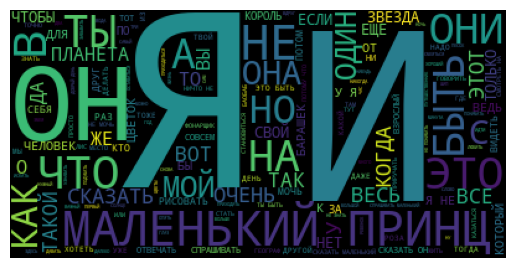

In [ ]:
# нарисуем облако слов (из тетрадки 11)
!pip3 install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#%matplotlib inline

# Генерируем облако слов
wordcloud = WordCloud().generate(', '.join(prince_lemmas))
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

Теперь нужно применить ту же процедуру ко всему корпусу
Для этого нужно 
1) составить список файлов
2) функцию find_lemmas сделать независимой от введенных root и body

In [ ]:
#попытки сделать список путей через модуль os не увенчались успехом,
# зато вот здесь написано, как это сделать попроще
# https://realpython.com/get-all-files-in-directory-python/#getting-a-list-of-all-files-and-folders-in-a-directory-in-python
# при этом очень удачно пригодилось, что не получилось поменять расширение файлов с tgt на txt
import pathlib 
SynTagRus_path = pathlib.Path("/Users/tatianafrolova/Downloads/SynTagRus")
file_list = list(SynTagRus_path.rglob("*.tgt")) 
# если просто glob без r, то достает файлы с нужным расширением только в указанной папке (а там их и нет)
# r - это типа рекурсия, поэтому эта штука полезет внутрь всех папок внутри указанной
print(len(file_list))
file_list[1:10]

1304


[PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/Sverkhnovaya_ekonomika.tgt'),
 PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/Podarok_dlya_vsekh.tgt'),
 PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/Povedenie.tgt'),
 PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/Transplantatsiya_organov.tgt'),
 PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/Uchebnik_istorii.tgt'),
 PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/Sumerki_rossiiskoi_korruptsii.tgt'),
 PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/Poslednyaya_taina.tgt'),
 PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/A_v_chem_vinovat_Kipr.tgt'),
 PosixPath('/Users/tatianafrolova/Downloads/SynTagRus/2013/Doroga_v_nikuda.tgt')]

In [ ]:
# название
file_list[1].stem


'Sverkhnovaya_ekonomika'

In [ ]:
# 1304 это похоже на правду
# проверяю, как сделать цикл для вызова всех файлов
first_lines_list = []
for k in range(len(file_list)):
#while k<10: - отличный способ получить полтора миллиона строк и поломку 
    with open (file_list[0],'r', encoding='UTF8') as f1:
        p1_text=f1.read()
        first_lines_list.append(p1_text[:20])
print(len(first_lines_list))


1304


Задача применить функцию find_lemmas ко всему корпусу

In [ ]:
# не нужно запускать, ячейка на память о хитром подвохе
# нужно переписать эту функцию так, чтобы можно было применять к разным файлам
#def find_lemmas(j):
#  for i in range(len(body[j])):  # body = root[1] root = tree.getroot() tree = ET.parse('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt')
#    if body[j][i].tag == 'W':
#      prince_lemmas.append(body[j][i].attrib['LEMMA'])
def find_all_lemmas(j):
    body = ET.parse('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt').getroot()[1]
    for i in range(len(body[j])):
        if body[j][i].tag == 'W':
            all_prince_lemmas.append(body[j][i].attrib['LEMMA'])

all_prince_lemmas = []    
find_all_lemmas(2)
print(all_prince_lemmas)
# эта ячейка для того, чтобы помнить, что пришлось от нее отказаться, хотя она и работала, см. ячейкой ниже

['НОРА', 'ГАЛЬ', 'ПЕРЕВОД']


In [ ]:
#переписываем такой кусок:
#for j in range(len(body)):
#   find_lemmas(j)
#вот что получается:

#for k in range(len(ET.parse('/content/drive/MyDrive/texts/Malenkii_prints_copy_1.txt').getroot()[1])):
#   find_all_lemmas(k)

#print(len(all_prince_lemmas))

# это работает ужасно долго и приходится прерывать
# видимо слишком долго при каждом прохоже делать парсинг
# нужно открыть файл один раз для каждого цикла

In [ ]:
# делаем функцию от двух переменных - каждый файл (то есть его BODY), каждый тег S
def find_all_lemmas(body, j):
    for i in range(len(body[j])):
        if body[j][i].tag == 'W':
            all_prince_lemmas.append(body[j][i].attrib['LEMMA'])

all_prince_lemmas = []    
find_all_lemmas(ET.parse('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt').getroot()[1], 2)
print(all_prince_lemmas)

['НОРА', 'ГАЛЬ', 'ПЕРЕВОД']


In [ ]:
all_prince_lemmas = [] 
body = ET.parse('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt').getroot()[1]
for j in range(len(body)):
   find_all_lemmas(body, j)
  
print(len(all_prince_lemmas))

# опять слишком долго, нужно и здесь вынести парсинг из цикла

12256


In [ ]:
all_prince_lemmas = [] 
for k in range(len(file_list)):
    body = ET.parse(file_list[k]).getroot()[1]
    for j in range(len(body)):
        find_all_lemmas(body, j)
print(len(all_prince_lemmas))


1515986


In [ ]:
# соответствует количеству словоупотреблений, приведенному на сайте ruscorpora
from collections import Counter
Counter(all_prince_lemmas).most_common(50)

[('В', 52870),
 ('И', 52019),
 ('НЕ', 24761),
 ('НА', 24296),
 ('БЫТЬ', 19159),
 ('ЧТО', 17780),
 ('С', 17134),
 ('ОН', 16643),
 ('Я', 11862),
 ('ЭТО', 10524),
 ('ОНИ', 10035),
 ('А', 9906),
 ('ПО', 9119),
 ('ЭТОТ', 9039),
 ('КОТОРЫЙ', 8676),
 ('НО', 8621),
 ('КАК', 8447),
 ('К', 8315),
 ('ТО', 8100),
 ('ГОД', 7706),
 ('ОНА', 7479),
 ('МЫ', 7106),
 ('ИЗ', 7076),
 ('О', 6823),
 ('ДЛЯ', 5857),
 ('СВОЙ', 5780),
 ('МОЧЬ', 5508),
 ('ОТ', 5417),
 ('ВЕСЬ', 5405),
 ('У', 5312),
 ('ЗА', 5202),
 ('ЧЕЛОВЕК', 5081),
 ('ТОТ', 4729),
 ('ОДИН', 4527),
 ('ТАКОЙ', 4375),
 ('ЖЕ', 4269),
 ('ВСЕ', 4154),
 ('ТАК', 3632),
 ('ИЛИ', 3631),
 ('ТОЛЬКО', 3565),
 ('УЖЕ', 3339),
 ('ЕЩЕ', 3327),
 ('ЕСЛИ', 3299),
 ('ДРУГОЙ', 3298),
 ('ВРЕМЯ', 3073),
 ('СЕБЯ', 3040),
 ('КОГДА', 2948),
 ('БЫ', 2944),
 ('ДО', 2918),
 ('НАШ', 2891)]

In [ ]:
len(Counter(all_prince_lemmas))

55726

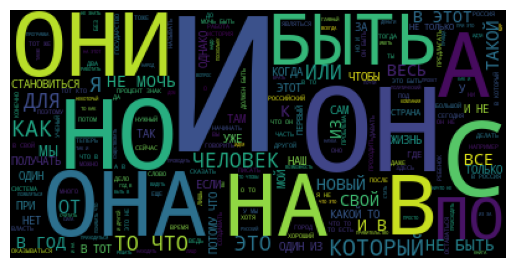

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#%matplotlib inline

# Генерируем облако слов
wordcloud = WordCloud().generate(', '.join(all_prince_lemmas))
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

Для того, чтобы с толком вычеркнуть из принца лишние слова применим tf idf

In [ ]:
file_list[0].stem

'Minfin_protiv_Glazieva'

In [ ]:
file_names_list = []
for f in file_list:
    file_names_list.append(f.stem)
print(file_names_list[1:10])
    

['Sverkhnovaya_ekonomika', 'Podarok_dlya_vsekh', 'Povedenie', 'Transplantatsiya_organov', 'Uchebnik_istorii', 'Sumerki_rossiiskoi_korruptsii', 'Poslednyaya_taina', 'A_v_chem_vinovat_Kipr', 'Doroga_v_nikuda']


In [ ]:
# 
def find_sentence_lemmas(body, j):
    lemmas = []    
    for i in range(len(body[j])):
        if body[j][i].tag == 'W':
            lemmas.append(body[j][i].attrib['LEMMA'])
    return lemmas

print((find_sentence_lemmas(ET.parse('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt').getroot()[1], 2)))
print((find_sentence_lemmas(ET.parse('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt').getroot()[1], 3)))

['НОРА', 'ГАЛЬ', 'ПЕРЕВОД']
['ЛЕОН', 'ВЕРТ']


In [ ]:
def find_text_lemmas(body):
    text_lemmas = []
    for j in range(len(body)):
       text_lemmas.extend(find_sentence_lemmas(body, j))
    return text_lemmas

print((find_text_lemmas(ET.parse('/Users/tatianafrolova/Desktop/Malenkii_prints_copy_1.txt').getroot()[1])))


['АНТУАН', 'ДЕ', 'СЕНТ-ЭКЗЮПЕРИ', 'МАЛЕНЬКИЙ', 'ПРИНЦ', 'НОРА', 'ГАЛЬ', 'ПЕРЕВОД', 'ЛЕОН', 'ВЕРТ', 'ПРОСИТЬ', 'РЕБЕНОК', 'ПРОЩАТЬ', 'Я', 'ЗА', 'ТО', 'ЧТО', 'Я', 'ПОСВЯЩАТЬ', 'ЭТОТ', 'КНИЖКА', 'ВЗРОСЛЫЙ', 'СКАЗАТЬ', 'В', 'ОПРАВДАНИЕ', 'ЭТОТ', 'ВЗРОСЛЫЙ', 'МОЙ', 'САМЫЙ', 'ЛУЧШИЙ', 'ДРУГ', 'И', 'ЕЩЕ', 'ОН', 'ПОНИМАТЬ', 'ВСЕ', 'НА', 'СВЕТ', 'ДАЖЕ', 'ДЕТСКИЙ', 'КНИЖКА', 'И', 'НАКОНЕЦ', 'ОН', 'ЖИТЬ', 'В', 'ФРАНЦИЯ', 'А', 'ТАМ', 'СЕЙЧАС', 'ГОЛОДНЫЙ', 'И', 'ХОЛОДНЫЙ', 'И', 'ОН', 'ОЧЕНЬ', 'НУЖДАТЬСЯ', 'В', 'УТЕШЕНИЕ', 'ЕСЛИ', 'ЖЕ', 'ВЕСЬ', 'ЭТО', 'Я', 'НЕ', 'ОПРАВДЫВАТЬ', 'Я', 'ПОСВЯЩАТЬ', 'ЭТОТ', 'КНИЖКА', 'ТОТ', 'МАЛЬЧИК', 'КАКОЙ', 'БЫТЬ', 'КОГДА-ТО', 'МОЙ', 'ВЗРОСЛЫЙ', 'ДРУГ', 'ВЕДЬ', 'ВЕСЬ', 'ВЗРОСЛЫЙ', 'СНАЧАЛА', 'БЫТЬ', 'РЕБЕНОК', 'ТОЛЬКО', 'МАЛО', 'КТО', 'ИЗ', 'ОНИ', 'О', 'ЭТО', 'ПОМНИТЬ', 'ИТАК', 'Я', 'ИСПРАВЛЯТЬ', 'ПОСВЯЩЕНИЕ', 'ЛЕОН', 'ВЕРТ', 'КОГДА', 'ОН', 'БЫТЬ', 'МАЛЕНЬКИЙ', 'I', 'КОГДА', 'Я', 'БЫТЬ', 'ШЕСТЬ', 'ГОД', 'В', 'КНИГА', 'ПОД', 'НАЗВАНИЕ', 'ПРАВДИВЫЙ', 'ИСТОРИЯ', 'ГДЕ', '

In [ ]:
corpus_lemmas = []
for f in file_list:
    corpus_lemmas.append(' '.join(find_text_lemmas(ET.parse(f).getroot()[1])))
print(len(corpus_lemmas))
#corpus_lemmas

1304


In [ ]:
!pip3 install sklearn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


In [ ]:
!pip3 install -U scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")

In [ ]:
tfidf = tfidf_vectorizer.fit_transform(corpus_lemmas)

In [ ]:
tfidf.shape

(1304, 54505)

In [ ]:
words = tfidf_vectorizer.get_feature_names_out()
len(words)

54505

In [ ]:
words[-220:-200]

array(['юшенков', 'юшин', 'юшкевич', 'я', 'ябеда', 'ябедница', 'яблоко',
       'яблоков', 'яблоневый', 'яблонька', 'яблоня', 'яблочко',
       'яблочник', 'яблочный', 'ява', 'яванский', 'явка', 'явление',
       'явлинский', 'являть'], dtype=object)

In [ ]:
!pip3 install pandas


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


In [ ]:

import pandas as pd

data = tfidf.todense().tolist() 
corpse = pd.DataFrame(data, columns = words, index = file_names_list)


In [ ]:
corpse.to_csv("corpse_tfidf.csv")

In [ ]:
#строка, соответствующая нашему тексту
print(len(corpse.loc['Malenkii_prints']))

54505


In [ ]:
# выкинуть нули и отсортировать по значениям
prints_tf_list = corpse.loc['Malenkii_prints']

In [ ]:
prints_tf_list[-220:-200]

ютландский    0.000000
ютьюб         0.000000
юф            0.000000
юшенков       0.000000
юшин          0.000000
юшкевич       0.000000
ябеда         0.000000
ябедница      0.000000
яблоко        0.000000
яблоков       0.000000
яблоневый     0.000000
яблонька      0.000000
яблоня        0.003127
яблочко       0.000000
яблочник      0.000000
яблочный      0.000000
ява           0.000000
яванский      0.000000
явка          0.000000
явление       0.001741
Name: Malenkii_prints, dtype: float64

In [ ]:
prints_tf_list["я"]

0.49568562885611334

In [ ]:
type(prints_tf_list)

pandas.core.series.Series

In [ ]:
print(file_names_list)

['Minfin_protiv_Glazieva', 'Sverkhnovaya_ekonomika', 'Podarok_dlya_vsekh', 'Povedenie', 'Transplantatsiya_organov', 'Uchebnik_istorii', 'Sumerki_rossiiskoi_korruptsii', 'Poslednyaya_taina', 'A_v_chem_vinovat_Kipr', 'Doroga_v_nikuda', 'Maski', 'ES-ofshor', 'Martovskaya_revolyutsiya', 'Strast_dushi', 'Plody_alternativnogo_prosveshcheniya', 'Kitaiskii_krossvord', 'Literatura', 'Esli_by_k_vlasti', 'Ataman_Vikhr', 'Pravo_na_obidu', 'Kooperativ_Lavka', 'Dvadtsat_let_spustya', 'Stalingrad', 'Putin_idet_na_ty', 'Budushchee_Medvedeva', 'Algoritm', 'Ukroshchenie_stroptivogo_naukograda', 'Sverzhenie_svetskogo_stroya', 'Katyn', 'Khidzhaby_ne_zakazyvali', 'Pravo_na_dukhovnuyu_pomoshch', 'Doktor_Z', 'Kamennyi_roi', 'Poslednii_dovod_issledovatelya', 'Zhivut_ne_dlya_radosti', 'Rossiya_na_evropeiskom_fone', 'Preodolet_kompleks_liliputa', 'Nauka', 'Davaite_zhit_smelo', 'Kulturnye_olimpiitsy', 'Chto_budet_posle', 'Granin', 'Travin_2', 'Bogi_menyayutsya', 'Travin_1', 'O_chem_rech', 'Vladimir_Vladimirovich